In [5]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq
from pandas import DataFrame

def fft_from_data_frame(data_frame):
    fs= 114e3
    row = data_frame.values[0]
    fft_data = fft(row)/row.size
    freq = fftfreq(row.size, d=1/fs)

    print(row.shape)
    
    fft_data = np.abs(fft_data)
    plt.plot(freq, fft_data)
    plt.show()

    cut_high_signal = (fft_data).copy()
    cut_high_signal[(freq > 50000)] = 0
    cut_high_signal[(freq < 30000)] = 0
    signal_without_0 = list(filter(lambda a: a != 0, cut_high_signal))
    
    print(np.array(signal_without_0).shape)
    plt.axis([30000,50000,0,0.075])
    plt.xlabel('Frequency')
    plt.ylabel('FFT')
    plt.plot(freq, cut_high_signal)
    plt.show()
    df = DataFrame(freq)
#     df.to_csv('./Documents/data_set/Result_without_filter/Frequencies/overall.csv')
#     df.to_excel('./Documents/data_set/Result_without_filter/Frequencies/overall.xls')

#     print(freq)
    print(cut_high_signal.shape)
#     print(df)


def get_fft_set(file_names):
    for files in file_names:
        data = pd.read_csv(files)
        fft_data = fft_from_data_frame(data)

(512,)


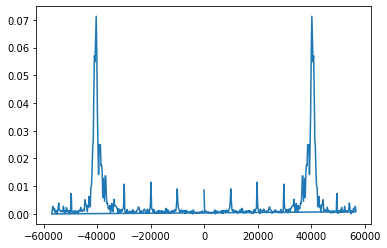

(90,)


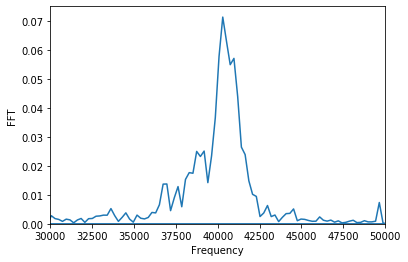

(512,)


In [6]:
car_front_1 = glob.glob('./Documents/data_set/Result_without_filter/67_Ford_Black_front/80_overall.csv')
car_front_1_fft = get_fft_set(car_front_1)